#Getting Started

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout


In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 [==============================] - 14s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


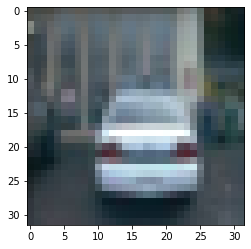

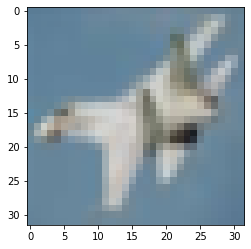

In [3]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

These are the classification classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Label: [0]
Pixel values: [[[255 255 255]
  [252 254 255]
  [231 234 235]
  ...
  [189 200 204]
  [187 198 202]
  [186 197 201]]

 [[255 255 255]
  [249 251 252]
  [217 221 223]
  ...
  [187 198 202]
  [185 196 200]
  [184 194 199]]

 [[255 255 255]
  [240 242 244]
  [190 193 197]
  ...
  [186 197 201]
  [184 195 199]
  [184 193 198]]

 ...

 [[132 131 126]
  [136 135 130]
  [144 143 138]
  ...
  [132 132 122]
  [131 131 121]
  [123 120 114]]

 [[129 128 122]
  [132 131 126]
  [139 138 133]
  ...
  [137 137 126]
  [133 133 123]
  [124 122 116]]

 [[131 128 123]
  [133 131 126]
  [140 137 132]
  ...
  [135 133 124]
  [139 137 130]
  [132 131 125]]]


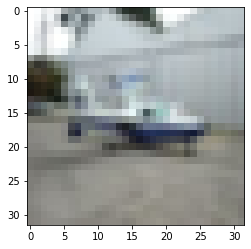

In [4]:
# Show label and pixel values of an image
print("Label:", y_train[0])
print("Pixel values:", X_train[0])

# Show the image
imgplot = plt.imshow(X_train[0])
plt.show()

#Process and normalize the image

In [5]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

Label: [0]
Pixel values: [[[1.         1.         1.        ]
  [0.98823529 0.99607843 1.        ]
  [0.90588235 0.91764706 0.92156863]
  ...
  [0.74117647 0.78431373 0.8       ]
  [0.73333333 0.77647059 0.79215686]
  [0.72941176 0.77254902 0.78823529]]

 [[1.         1.         1.        ]
  [0.97647059 0.98431373 0.98823529]
  [0.85098039 0.86666667 0.8745098 ]
  ...
  [0.73333333 0.77647059 0.79215686]
  [0.7254902  0.76862745 0.78431373]
  [0.72156863 0.76078431 0.78039216]]

 [[1.         1.         1.        ]
  [0.94117647 0.94901961 0.95686275]
  [0.74509804 0.75686275 0.77254902]
  ...
  [0.72941176 0.77254902 0.78823529]
  [0.72156863 0.76470588 0.78039216]
  [0.72156863 0.75686275 0.77647059]]

 ...

 [[0.51764706 0.51372549 0.49411765]
  [0.53333333 0.52941176 0.50980392]
  [0.56470588 0.56078431 0.54117647]
  ...
  [0.51764706 0.51764706 0.47843137]
  [0.51372549 0.51372549 0.4745098 ]
  [0.48235294 0.47058824 0.44705882]]

 [[0.50588235 0.50196078 0.47843137]
  [0.5176470

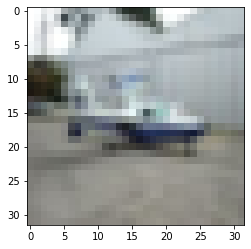

In [6]:
# Show label and pixel values of an image after normalize
print("Label:", y_train[0])
print("Pixel values:", X_train_norm[0])

# Show the image
imgplot = plt.imshow(X_train_norm[0])
plt.show()

#First DNN

In [7]:
# Initialize dnn_model as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model = Sequential() # Initialize a sequential model.

dnn_model.add(Conv2D(filters=32, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model.add(Flatten()) # Flatten the vector to 1D
dnn_model.add(Dense(64, activation='relu')) # Add FC layer and Relu activation
dnn_model.add(Dense(32, activation='relu')) # Add FC layer and Relu activation
dnn_model.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [8]:
# Compile the model
dnn_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = dnn_model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=256, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/10
176/176 [==============================] - 11s 19ms/step - loss: 1.9446 - accuracy: 0.2690 - val_loss: 1.6188 - val_accuracy: 0.3932
Epoch 2/10
176/176 [==============================] - 3s 15ms/step - loss: 1.4838 - accuracy: 0.4559 - val_loss: 1.3855 - val_accuracy: 0.4898
Epoch 3/10
176/176 [==============================] - 3s 16ms/step - loss: 1.2752 - accuracy: 0.5416 - val_loss: 1.3126 - val_accuracy: 0.5120
Epoch 4/10
176/176 [==============================] - 3s 16ms/step - loss: 1.1670 - accuracy: 0.5812 - val_loss: 1.1720 - val_accuracy: 0.5786
Epoch 5/10
176/176 [==============================] - 3s 15ms/step - loss: 1.0696 - accuracy: 0.6153 - val_loss: 1.1280 - val_accuracy: 0.6042
Epoch 6/10
176/176 [==============================] - 3s 16ms/step - loss: 1.0324 - accuracy: 0.6313 - val_loss: 1.0915 - val_accuracy: 0.6042
Epoch 7/10
176/176 [==============================] - 3s 15ms/step - loss: 0.9851 - accuracy: 0.6475 - val_loss: 1.0824 - val_accuracy: 0.614

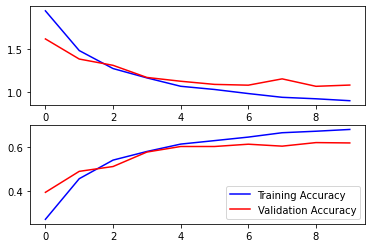

In [9]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')
# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [10]:
# Show the model performance
result = dnn_model.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 4ms/step - loss: 1.0712 - accuracy: 0.6286
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 1.071168303489685, accuracy = 0.628600001335144


#Second DNN

In [11]:
# Initialize dnn_model as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model_2 = Sequential() # Initialize a sequential model.

dnn_model_2.add(Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model_2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model_2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model_2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model_2.add(Flatten()) # Flatten the vector to 1D
dnn_model_2.add(Dense(128, activation='relu')) # Add FC layer and Relu activation
dnn_model_2.add(Dense(64, activation='relu')) # Add FC layer and Relu activation
dnn_model_2.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [12]:
# Compile the model
dnn_model_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_2 = dnn_model_2.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=256, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/10
176/176 [==============================] - 3s 15ms/step - loss: 2.3092 - accuracy: 0.1015 - val_loss: 2.3036 - val_accuracy: 0.0960
Epoch 2/10
176/176 [==============================] - 2s 13ms/step - loss: 2.3031 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.0960
Epoch 3/10
176/176 [==============================] - 2s 13ms/step - loss: 2.3031 - accuracy: 0.1016 - val_loss: 2.3038 - val_accuracy: 0.0980
Epoch 4/10
176/176 [==============================] - 2s 14ms/step - loss: 2.3033 - accuracy: 0.0992 - val_loss: 2.3031 - val_accuracy: 0.1042
Epoch 5/10
176/176 [==============================] - 2s 13ms/step - loss: 2.3030 - accuracy: 0.0981 - val_loss: 2.3031 - val_accuracy: 0.0960
Epoch 6/10
176/176 [==============================] - 2s 13ms/step - loss: 2.3033 - accuracy: 0.1007 - val_loss: 2.3035 - val_accuracy: 0.0960
Epoch 7/10
176/176 [==============================] - 2s 13ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3032 - val_accuracy: 0.0970

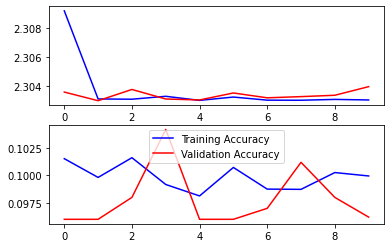

In [13]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_2.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_2.history['val_loss'],color='r',label='Validation Loss')
# Plot training and validation accuracy
ax[1].plot(history_2.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_2.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [14]:
# Show the model performance
result = dnn_model_2.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model_2.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 2.3032 - accuracy: 0.1000
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 2.303191900253296, accuracy = 0.10000000149011612
